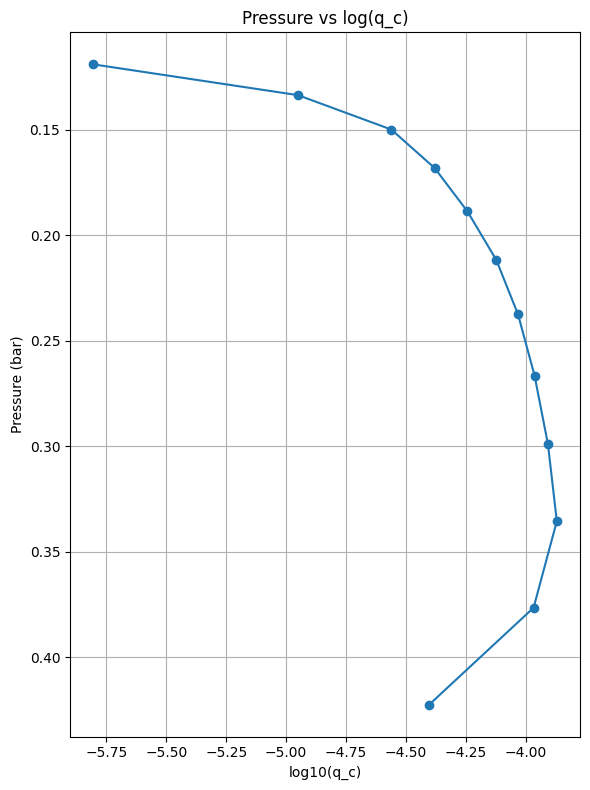

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/home/sansar1/Codes/cloud_model/output/voyager_frain1_sig2.out"
# Read numerical data from the file (skip header lines until the data starts)
data = []
with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        # print(line)
        parts = line.strip().split()
        if len(parts) == 8:  # only data lines have 8 columns
            data.append([float(x.replace("E", "e")) for x in parts])

# Convert to numpy array
data = np.array(data)
# print(data)

# Extract columns
pressure = data[:, 1]   # 2nd column = pressure
qc = data[:, 4]         # 5th column = q_c

# Filter out zero or negative q_c values (log undefined)
mask = qc > 0
pressure = pressure[mask]
qc = qc[mask]

# Plot Pressure vs log10(q_c)
plt.figure(figsize=(6, 8))
plt.plot(np.log10(qc), pressure*10**(-6), marker='o')

plt.gca().invert_yaxis()  # invert pressure axis
plt.xlabel("log10(q_c)")
plt.ylabel("Pressure (bar)")  # assuming pressure in bar (confirm units)
plt.title("Pressure vs log(q_c)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Convert pressure from dyne/cm^2 to bar (1 bar = 1e6 dyne/cm^2)
pressure_bar = pressure * 1e-6  

# Take log10 of pressure (for y-axis plotting)
logP = np.log10(pressure_bar)

# Plot logP vs log10(q_c)
plt.figure(figsize=(6, 8))
plt.plot(np.log10(qc*(2.2/17)), pressure_bar, marker='o')
# print(np.log10(0.1244))

plt.gca().invert_yaxis()  # invert axis to match usual convention (high P at bottom)
plt.xlabel("log10(q_c)")
plt.ylabel("log10(Pressure [bar])")
plt.yscale('log')  # set y-axis to log scale
plt.title("Pressure vs log(q_c) (Pressure converted to bar)")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'pressure' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/home/sansar1/Codes/cloud_model/output/voyager_frain1_sig2.out"

# Read numerical data from the file (skip header lines until the data starts)
data = []
with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 8:  # only data lines have 8 columns
            data.append([float(x.replace("E", "e")) for x in parts])

# Convert to numpy array
data = np.array(data)

# Extract columns
pressure = data[:, 1]   # 2nd column = pressure
qc = data[:, 4]         # 5th column = q_c

# Filter out zero or negative q_c values (log undefined)
mask = qc > 0
pressure = pressure[mask]
qc = qc[mask]

# Convert pressure from dyne/cm^2 to bar (1 bar = 1e6 dyne/cm^2)
pressure_bar = pressure * 1e-6  

# Compute logs for plotting
logP = np.log10(pressure_bar)
log_qc = np.log10(qc * (2.2/17))   # converted mixing ratio (example scaling)

# Plot log(q_c) vs log(P)
plt.figure(figsize=(6, 8))
plt.plot(log_qc, pressure_bar, marker='o')

# Invert pressure axis so higher P at bottom
plt.gca().invert_yaxis()

plt.xlabel("log10(q_c)")
plt.ylabel("Pressure [bar] (log scale)")
plt.yscale('log')  # logarithmic scale for pressure
plt.title("Pressure vs log(q_c) (Pressure in bar)")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '0.000e+00b'

In [1]:
print(2.2/17)

0.12941176470588237


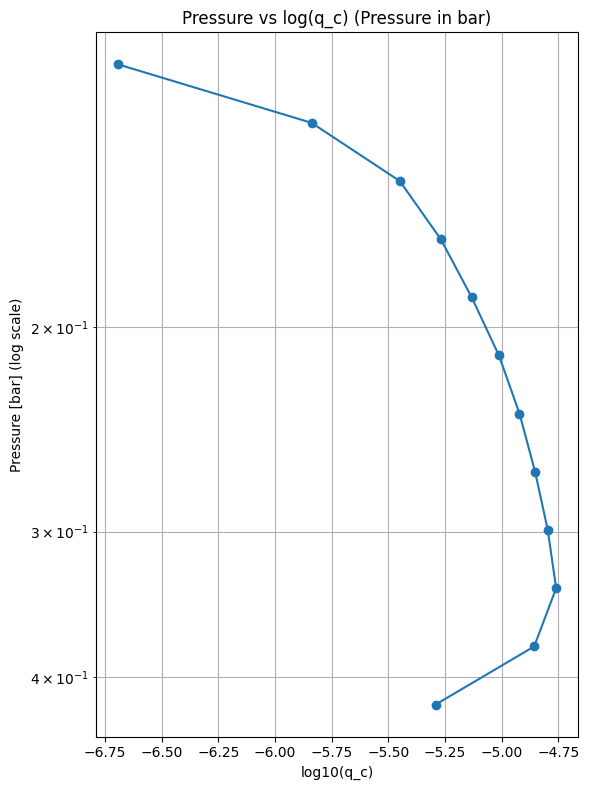

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

file_path = "/home/sansar1/Codes/cloud_model/output/voyager_frain1_sig2.out"

# Read numerical data from the file (skip header lines until the data starts)
data = []
with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 8:  # only data lines have 8 columns
            clean_parts = []
            for x in parts:
                # Remove any trailing non-numeric characters (like 'b')
                x_clean = re.sub(r'[^0-9eE\+\-\.]', '', x)
                if x_clean:  # make sure not empty
                    clean_parts.append(float(x_clean))
            if len(clean_parts) == 8:
                data.append(clean_parts)

# Convert to numpy array
data = np.array(data)

# Extract columns
pressure = data[:, 1]   # 2nd column = pressure
qc = data[:, 4]         # 5th column = q_c

# Filter out zero or negative q_c values (log undefined)
mask = qc > 0
pressure = pressure[mask]
qc = qc[mask]

# Convert pressure from dyne/cm^2 to bar (1 bar = 1e6 dyne/cm^2)
pressure_bar = pressure * 1e-6  

# Compute logs for plotting
log_qc = np.log10(qc * (2.2/17))   # scaled q_c

# Plot log(q_c) vs Pressure (log scale on y)
plt.figure(figsize=(6, 8))
plt.plot(log_qc, pressure_bar, marker='o')

# Invert pressure axis so higher P at bottom
plt.gca().invert_yaxis()
plt.yscale('log')

plt.xlabel("log10(q_c)")
plt.ylabel("Pressure [bar] (log scale)")
plt.title("Pressure vs log(q_c) (Pressure in bar)")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


/tmp/ipykernel_4441/329398138.py:60: RuntimeWarning: divide by zero encountered in log10
  print(np.log10(qc2))


[       -inf -5.80465394 -4.95039439 -4.56114134 -4.38007229 -4.24366823
 -4.12337808 -4.03273291 -3.96377046 -3.90798153 -3.87095494 -3.9677843
 -4.40296334        -inf        -inf        -inf        -inf        -inf
        -inf]
[0.1061 0.119  0.1336 0.1499 0.1682 0.1887 0.2117 0.2375 0.2665 0.299
 0.3355 0.3765 0.4224 0.4739 0.5318 0.5966 0.6695 0.7996 0.9456]
Saved figure to voyager_qc_log_only.png


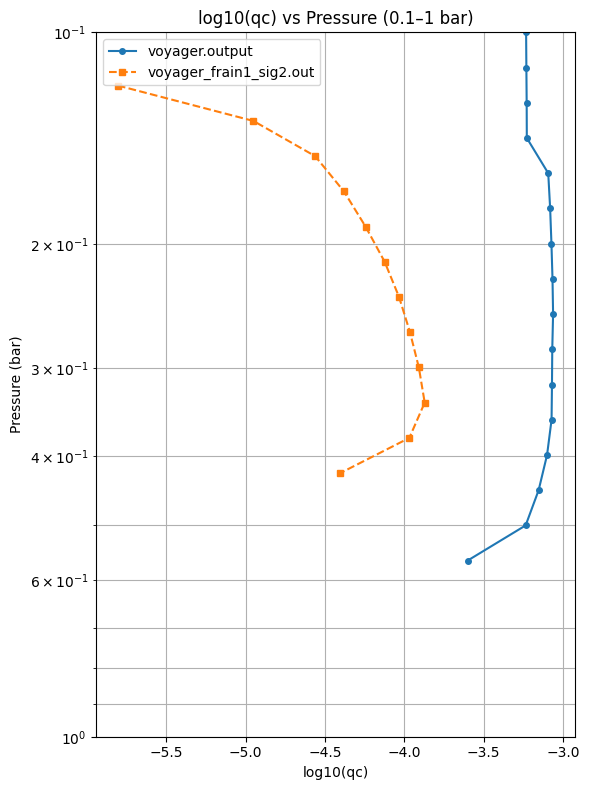

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re

INPUT1 = "/home/sansar1/Codes/cloud_model/voyage.output"
INPUT2 = "/home/sansar1/Codes/cloud_model/output/voyager_frain1_sig2.out"

def read_voyager_simple(fname):
    """Reads 2-column voyage.output (pressure in bar, qc)."""
    pressures, qc = [], []
    with open(fname, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split()
            if len(parts) < 2:
                continue
            p = float(parts[0])   # already in bar
            q = float(parts[1])
            pressures.append(p)
            qc.append(q)
    return np.array(pressures), np.array(qc)

def read_voyager_frain(fname):
    """Reads voyager_frain1_sig2.out (8-column file, pressure in dyne/cm^2)."""
    data = []
    with open(fname, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 8:
                clean_parts = []
                for x in parts:
                    x_clean = re.sub(r'[^0-9eE\+\-\.]', '', x)
                    if x_clean:
                        clean_parts.append(float(x_clean))
                if len(clean_parts) == 8:
                    data.append(clean_parts)
    data = np.array(data)
    pressure = data[:, 1] * 1e-6  # dyne/cm^2 → bar
    qc = data[:, 4]  # apply scaling factor
    return pressure, qc

def main():
    # Read both files
    p1, qc1 = read_voyager_simple(INPUT1)
    p2, qc2 = read_voyager_frain(INPUT2)

    # Sort both by pressure
    order1 = np.argsort(p1)
    order2 = np.argsort(p2)
    p1, qc1 = p1[order1], qc1[order1]
    p2, qc2 = p2[order2], qc2[order2]

    # Mask 0.1–1 bar range
    mask1 = (p1 >= 0.1) & (p1 <= 1.0)
    mask2 = (p2 >= 0.1) & (p2 <= 1.0)
    p1, qc1 = p1[mask1], qc1[mask1]
    p2, qc2 = p2[mask2], qc2[mask2]
    print(np.log10(qc2))
    print(p2)

    # Prepare logs (mask zeros and negatives)
    logqc1 = np.full_like(qc1, np.nan)
    logqc2 = np.full_like(qc2, np.nan)
    logqc1[qc1 > 0] = np.log10(qc1[qc1 > 0])
    logqc2[qc2 > 0] = np.log10(qc2[qc2 > 0])

    # Plot only log10(qc)
    plt.figure(figsize=(6, 8))
    plt.plot(logqc1[~np.isnan(logqc1)], p1[~np.isnan(logqc1)],
             marker='o', linestyle='-', markersize=4, label="voyager.output")
    plt.plot(logqc2[~np.isnan(logqc2)], p2[~np.isnan(logqc2)],
             marker='s', linestyle='--', markersize=4, label="voyager_frain1_sig2.out")

    plt.gca().invert_yaxis()
    plt.yscale('log')
    plt.ylim(1.0, 0.1)

    plt.xlabel("log10(qc)")
    plt.ylabel("Pressure (bar)")
    plt.title("log10(qc) vs Pressure (0.1–1 bar)")
    plt.legend()
    plt.grid(True, which="both")

    plt.tight_layout()
    plt.savefig("voyager_qc_log_only.png", dpi=200)
    print("Saved figure to voyager_qc_log_only.png")
    plt.show()

if __name__ == "__main__":
    main()


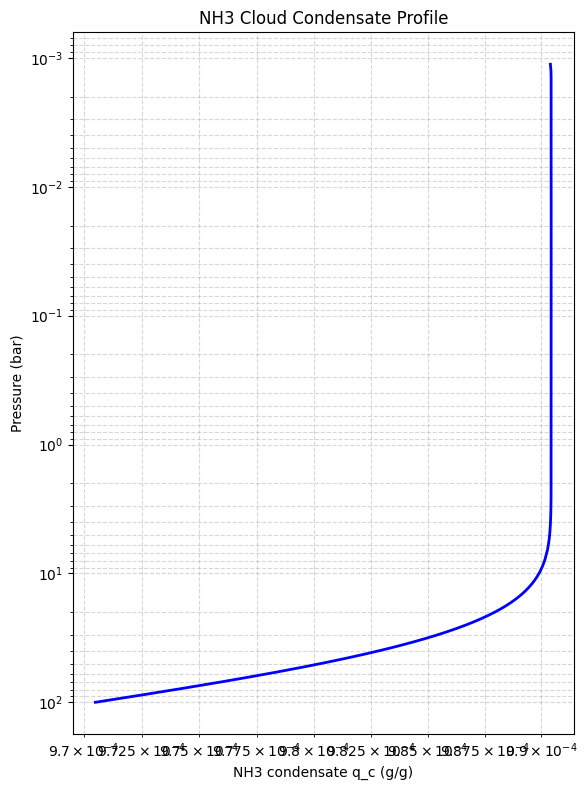

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file (or paste your array into a file)
data = np.loadtxt("/home/sansar1/Codes/cloud_model/voyager.output")  # replace with your filename

pressure = data[:, 0]   # bar
qc = data[:, 1]         # g/g

# Matplotlib plot: log pressure axis (common for atmospheric profiles)
plt.figure(figsize=(6, 8))
plt.plot(qc, pressure, 'b-', linewidth=2)
plt.gca().invert_yaxis()   # Pressure decreases upward
plt.xscale('log')          # Optional: log scale for qc if desired
plt.yscale('log')          # Optional: log scale for pressure
plt.xlabel("NH3 condensate q_c (g/g)")
plt.ylabel("Pressure (bar)")
plt.title("NH3 Cloud Condensate Profile")
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()
